In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("lahman2016.sqlite")

In [2]:
query = '''select * from Teams 
inner join TeamsFranchises
on Teams.franchID == TeamsFranchises.franchID
where Teams.G >= 150 and TeamsFranchises.active == "Y";
'''
Teams = conn.execute(query).fetchall()
teams_df = pd.DataFrame(Teams)
print(Teams[0])
print(teams_df.head())

(1961, 'AL', 'LAA', 'ANA', None, 8, 162, 82, 70, 91, None, None, 'N', 'N', 744, 5424, 1331, 218, 22, 189, 681, 1068, 37, 28, None, None, 784, 689, 4.31, 25, 5, 34, 4314, 1391, 180, 713, 973, 192, 154, 0.969, 'Los Angeles Angels', 'Wrigley Field (LA)', 603510, 111, 112, 'LAA', 'LAA', 'LAA', 'ANA', 'Los Angeles Angels of Anaheim', 'Y', None)
     0   1    2    3     4   5    6     7   8   9   ...        42   43   44  \
0  1961  AL  LAA  ANA  None   8  162  82.0  70  91  ...    603510  111  112   
1  1962  AL  LAA  ANA  None   3  162  81.0  86  76  ...   1144063   97   97   
2  1963  AL  LAA  ANA  None   9  161  81.0  70  91  ...    821015   94   94   
3  1964  AL  LAA  ANA  None   5  162  81.0  82  80  ...    760439   90   90   
4  1965  AL  CAL  ANA  None   7  162  80.0  75  87  ...    566727   97   98   

    45   46   47   48                             49  50    51  
0  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
1  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim 

In [3]:
print(len(teams_df))

2287


In [4]:
cols = ["yearID","lgID","teamID","franchID","divID","Rank","G","Ghome","W","L","DivWin","WCWin","LgWin","WSWin","R","AB","H","2B","3B","HR","BB","SO","SB","CS","HBP","SF","RA","ER","ERA","CG","SHO","SV","IPouts","HA","HRA","BBA",
"SOA","E","DP","FP","name","park","attendance","BPF","PPF","teamIDBR","teamIDlahman45","teamIDretro ","franchID","franchName","active","NAassoc "
]
teams_df.columns = cols
print(teams_df.head())

   yearID lgID teamID  franchID divID  Rank    G  Ghome   W   L    ...     \
0    1961   AL    LAA       ANA  None     8  162   82.0  70  91    ...      
1    1962   AL    LAA       ANA  None     3  162   81.0  86  76    ...      
2    1963   AL    LAA       ANA  None     9  161   81.0  70  91    ...      
3    1964   AL    LAA       ANA  None     5  162   81.0  82  80    ...      
4    1965   AL    CAL       ANA  None     7  162   80.0  75  87    ...      

  attendance  BPF  PPF teamIDBR  teamIDlahman45  teamIDretro   franchID  \
0     603510  111  112      LAA             LAA           LAA       ANA   
1    1144063   97   97      LAA             LAA           LAA       ANA   
2     821015   94   94      LAA             LAA           LAA       ANA   
3     760439   90   90      LAA             LAA           LAA       ANA   
4     566727   97   98      CAL             CAL           CAL       ANA   

                      franchName  active  NAassoc   
0  Los Angeles Angels of Anaheim 

In [5]:
df = teams_df[["yearID","teamID","G","W","R","AB","H","2B","3B","HR","BB","SO","SB","RA","ER","ERA","CG",
"SHO","SV","IPouts","HA","HRA","BBA","SOA","E","DP","FP"]]
print(df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0]


In [6]:
df = df.dropna()
print(len(df))

2155


(array([  12.,   30.,  102.,  251.,  407.,  478.,  485.,  305.,   76.,    9.]),
 array([  36.,   44.,   52.,   60.,   68.,   76.,   84.,   92.,  100.,
         108.,  116.]),
 <a list of 10 Patch objects>)

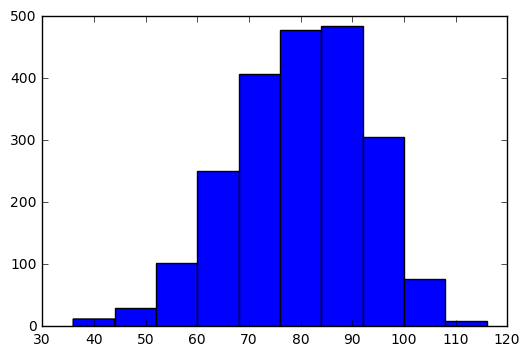

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df["W"])

In [8]:
df = df[df["yearID"] > 1905]

In [9]:
def assign_win_bins(W):
    if W < 40:
        return 0
    if W >= 40 and W <= 49:
        return 1
    if W >= 50 and W <= 59:
        return 2
    if W >= 60 and W <= 69:
        return 3
    if W >= 70 and W <= 79:
        return 4
    if W >= 80 and W <= 89:
        return 5
    if W >= 90 and W <= 99:
        return 6
    if W >= 100 and W <= 109:
        return 7
    if W >= 110 and W <= 119:
        return 8
    
df["win_bins"] = df["W"].apply(assign_win_bins)

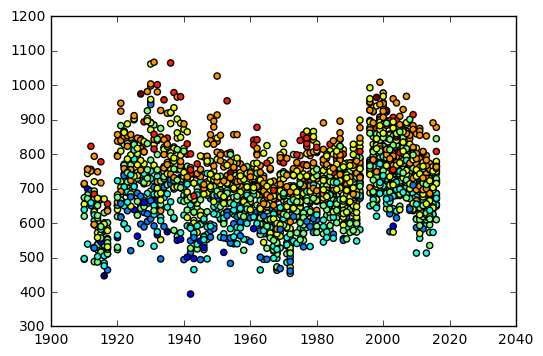

In [10]:
plt.scatter(df["yearID"], df["R"], c=df["win_bins"])

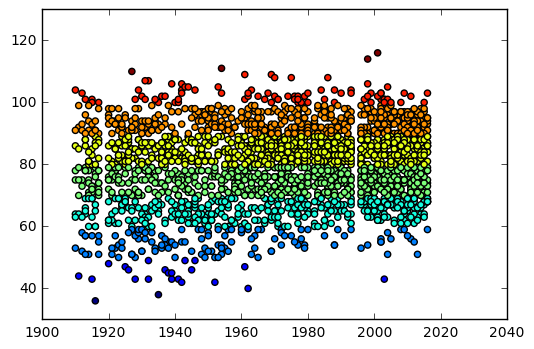

In [11]:
plt.scatter(df["yearID"], df["W"], c=df["win_bins"])

In [12]:
# Creating "year_label" column, which will give our algorithm information about how certain years are related (Dead ball eras, Live ball/Steroid Eras)

def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8
    
df["year_label"] = df["yearID"].apply(assign_label)
dummy_df = pd.get_dummies(df["year_label"], prefix="era")
df = pd.concat([df, dummy_df], axis=1)

In [13]:
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010
    
df["decade_label"] = df["yearID"].apply(assign_decade)
decade_df = pd.get_dummies(df["decade_label"], prefix="decade")
df = pd.concat([df, decade_df], axis=1)

In [14]:
df = df.drop(["yearID","year_label","decade_label"], axis=1)

In [35]:
print(df.columns)

Index(['teamID', 'G', 'W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB',
       'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA',
       'SOA', 'E', 'DP', 'FP', 'win_bins', 'era_1', 'era_2', 'era_3', 'era_4',
       'era_5', 'era_6', 'era_7', 'era_8', 'decade_1910', 'decade_1920',
       'decade_1930', 'decade_1940', 'decade_1950', 'decade_1960',
       'decade_1970', 'decade_1980', 'decade_1990', 'decade_2000',
       'decade_2010'],
      dtype='object')


In [15]:
df.corr()["W"]

G              0.176993
W              1.000000
R              0.547042
AB             0.243271
H              0.374653
2B             0.246455
3B             0.011668
HR             0.332152
BB             0.347757
SO             0.077403
SB             0.146808
RA            -0.544575
ER            -0.434657
ERA           -0.485965
CG            -0.013659
SHO            0.446973
SV             0.399833
IPouts         0.324340
HA            -0.421309
HRA           -0.016633
BBA           -0.322156
SOA            0.256120
E             -0.312019
DP            -0.020038
FP             0.328143
win_bins       0.975598
era_1         -0.053280
era_2         -0.094188
era_3         -0.037311
era_4         -0.060738
era_5          0.038795
era_6          0.055326
era_7          0.062907
era_8          0.041299
decade_1910   -0.053280
decade_1920   -0.062268
decade_1930   -0.059220
decade_1940   -0.057036
decade_1950   -0.054159
decade_1960    0.025737
decade_1970    0.030559
decade_1980    0

In [16]:
win_bin_cols = ["G","R","AB","H","2B","3B","HR","BB","SO","SB","RA","ER","ERA","CG",
"SHO","SV","IPouts","HA","HRA","BBA","SOA","E","DP","FP","era_1","era_2","era_3","era_4","era_5","era_6","era_7","era_8","decade_1910","decade_1920","decade_1930","decade_1940","decade_1950","decade_1960","decade_1970","decade_1980",
"decade_1990","decade_2000","decade_2010","win_bins"]

In [17]:
numeric_cols = ["G","R","AB","H","2B","3B","HR","BB","SO","SB","RA","ER","ERA","CG",
"SHO","SV","IPouts","HA","HRA","BBA","SOA","E","DP","FP","era_1","era_2","era_3","era_4","era_5","era_6","era_7","era_8","decade_1910","decade_1920","decade_1930","decade_1940","decade_1950","decade_1960","decade_1970","decade_1980",
"decade_1990","decade_2000","decade_2010","W"]

In [18]:
attributes = ["G","R","AB","H","2B","3B","HR","BB","SO","SB","RA","ER","ERA","CG",
"SHO","SV","IPouts","HA","HRA","BBA","SOA","E","DP","FP","era_1","era_2","era_3","era_4","era_5","era_6","era_7","era_8",
"decade_1910","decade_1920","decade_1930","decade_1940","decade_1950","decade_1960","decade_1970","decade_1980",
"decade_1990","decade_2000","decade_2010"]

In [19]:
Wins = df["W"]

In [20]:
from sklearn.preprocessing import scale
data = scale(df[numeric_cols])
win_bin_data = scale(df[win_bin_cols])

In [21]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1)
distances = kmeans_model.fit_transform(data)

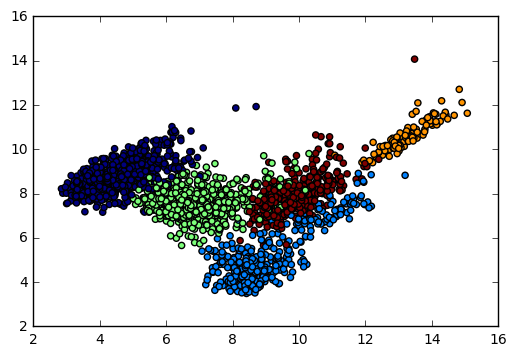

In [22]:
labels = kmeans_model.labels_
plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.show()

In [23]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
s_score_dict = {}
for i in range(2,10):
    km = KMeans(n_clusters=i, random_state=1)
    l = km.fit_predict(data)
    s_s = metrics.silhouette_score(data, l)
    s_score_dict[i] = [s_s]
print(s_score_dict)

{2: [0.23284166486873539], 3: [0.16338687012755204], 4: [0.19985177975399759], 5: [0.23133714155044363], 6: [0.26816072066021357], 7: [0.28885762381151375], 8: [0.30661907535113891], 9: [0.30735163049790515]}


In [24]:
from sklearn.decomposition import RandomizedPCA
randomized_pca = RandomizedPCA(n_components=2)
reduced_data_rpca = randomized_pca.fit_transform(win_bin_data)

In [25]:
import numpy as np
print(reduced_data_rpca.shape)
print(reduced_data_rpca[0:10])

(2147, 2)
[[-1.37084416  0.58170267]
 [-0.56864563 -1.2041488 ]
 [ 0.40398418 -2.33858909]
 [ 0.78886409 -5.20650797]
 [ 0.89508036 -4.03816691]
 [-0.06728763 -2.88192733]
 [ 0.36286222 -4.28531263]
 [ 0.87369222 -3.59526582]
 [ 0.41068433 -3.20186175]
 [-0.92124129 -2.74311783]]


In [26]:
colors = ['white','red','orange', 'yellow','lime','purple','blue','grey','black']

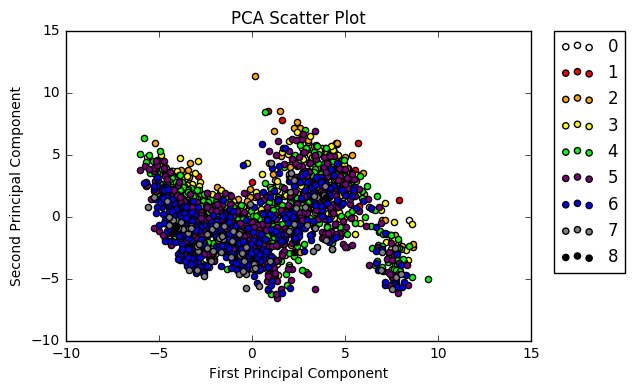

In [27]:
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][df["win_bins"].values == i]
    y = reduced_data_rpca[:, 1][df["win_bins"].values == i]
    plt.scatter(x, y, c=colors[i])
plt.legend(sorted(df["win_bins"].unique()), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

In [28]:
print(len(df["W"].unique()))

75


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import mean_absolute_error

In [32]:
data_df = pd.DataFrame(data)
train = data_df.sample(frac=0.8, random_state=1)
test = data_df.loc[~data_df.index.isin(train.index)]

In [37]:
print(df[numeric_cols].head(3))

     G    R    AB     H   2B  3B   HR   BB      SO  SB ...  decade_1930  \
0  162  744  5424  1331  218  22  189  681  1068.0  37 ...          0.0   
1  162  718  5499  1377  232  35  137  602   917.0  46 ...          0.0   
2  161  597  5506  1378  208  38   95  448   916.0  43 ...          0.0   

   decade_1940  decade_1950  decade_1960  decade_1970  decade_1980  \
0          0.0          0.0          1.0          0.0          0.0   
1          0.0          0.0          1.0          0.0          0.0   
2          0.0          0.0          1.0          0.0          0.0   

   decade_1990  decade_2000  decade_2010   W  
0          0.0          0.0          0.0  70  
1          0.0          0.0          0.0  86  
2          0.0          0.0          0.0  70  

[3 rows x 44 columns]


In [44]:
print(train.loc[:,0:42].head(3))

           0         1         2         3         4         5         6   \
628  0.750247  0.702872  0.683872  0.747855  0.090649  0.099895  1.295989   
353  0.750247  1.322955  0.936147  1.278269  1.991586 -0.058623  1.006448   
858  0.750247  0.235269  1.007301  0.657784 -0.284845 -0.164301  1.025751   

           7         8         9     ...           33        34        35  \
628  0.335879  0.587964  0.467764    ...    -0.283766 -0.278947 -0.281846   
353  0.964305  0.368254 -0.565588    ...    -0.283766 -0.278947 -0.281846   
858 -0.631898 -0.106476 -0.005856    ...    -0.283766 -0.278947 -0.281846   

           36        37        38        39        40        41        42  
628 -0.283766 -0.318733  2.779864 -0.349744 -0.339595 -0.403021 -0.329264  
353 -0.283766 -0.318733 -0.359730 -0.349744  2.944685 -0.403021 -0.329264  
858 -0.283766 -0.318733 -0.359730  2.859233 -0.339595 -0.403021 -0.329264  

[3 rows x 43 columns]


In [46]:
lr = LinearRegression()
lr.fit(train.iloc[:,0:42], train.iloc[:,43])
predictions = lr.predict(test.iloc[:,0:42])

In [48]:
mae = mean_absolute_error(test.iloc[:,43], predictions)
print(mae)

0.206460153172


In [49]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(train.iloc[:,0:42], train.iloc[:,43])
predictions_dtr = dtr.predict(test.iloc[:,0:42])
mae_dtr = mean_absolute_error(test.iloc[:,43], predictions_dtr)
print(mae_dtr)

0.370451261428


In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=10, min_samples_leaf=2)
rfr.fit(train.iloc[:,0:42], train.iloc[:,43])
predictions_rfr = rfr.predict(test.iloc[:,0:42])
mae_rfr = mean_absolute_error(test.iloc[:,43], predictions_rfr)
print(mae_rfr)

0.258444927152


In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(train[attributes], train["W"])
predictions_dtr = dtr.predict(test[attributes])
mae_dtr = mean_absolute_error(test["W"], predictions_dtr)
print(mae_dtr)